In [2]:
# Imports
import os
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1')
import pickle
import time
import dgl
import torch as th
import WLColorRefinement.create_reduced_graph as crg
import networkx as nx
import WLColorRefinement.WLColorRefinement as wl

Using backend: pytorch


In [12]:
"""
    Funtion to draw the graph\n",
"""
def drawGraph(G):
    nx_G = G.to_networkx().to_undirected()
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos, with_labels=True, node_color=G.ndata['feat'])

In [3]:
# u = th.tensor([1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 9])
# v = th.tensor([2, 1, 3, 5, 2, 7, 5, 2, 4, 6, 7, 5, 9, 3, 6, 8, 7, 6])

u = th.tensor([0, 1, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 8])
v = th.tensor([1, 0, 2, 4, 1, 6, 4, 1, 3, 5, 6, 4, 8, 2, 5, 7, 6, 5])
# feat = th.tensor([1, 0, 2, 0, 0, 1, 1, 2, 2])

feat = th.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])
g = dgl.graph((u, v))
g = dgl.graph((u, v), num_nodes=9)
g.ndata['feat'] = feat
# g.ndata['original_feat'] = feat

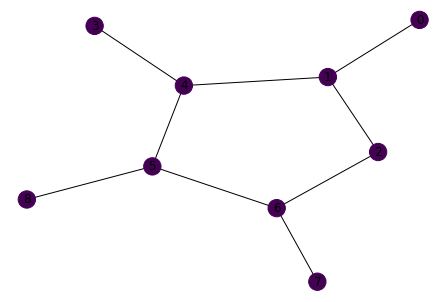

In [4]:
drawGraph(g)
with open('toy_example_orignal.pkl', 'wb') as f:
    pickle.dump(g,f)

In [5]:
colored_graph = wl.wl_coloring(g)

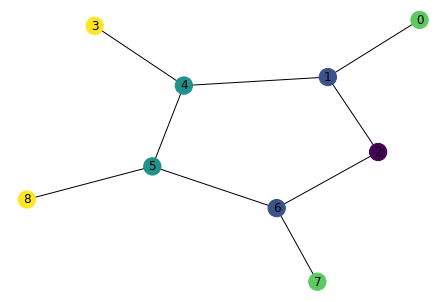

In [6]:
drawGraph(colored_graph)

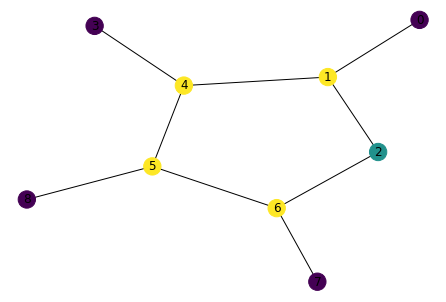

In [7]:
import pickle
with open('iteration0.pkl', 'rb') as f:
    g0 = pickle.load(f)
    drawGraph(g0)

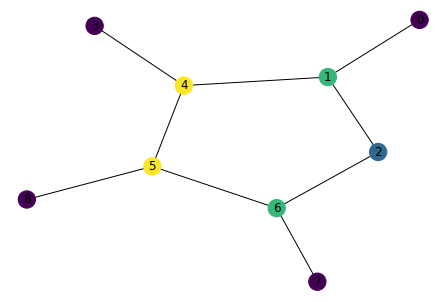

In [8]:
import pickle
with open('iteration1.pkl', 'rb') as f:
    g1 = pickle.load(f)
    drawGraph(g1)

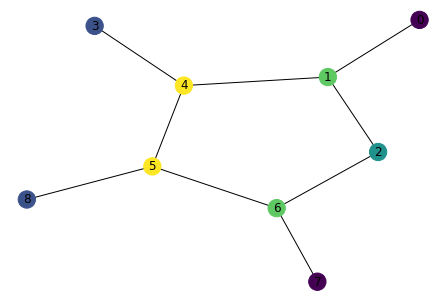

In [9]:
import pickle
with open('iteration2.pkl', 'rb') as f:
    g2 = pickle.load(f)
    drawGraph(g2)

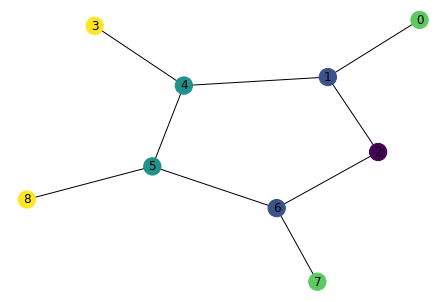

In [10]:
import pickle
with open('iteration3.pkl', 'rb') as f:
    g3 = pickle.load(f)
    drawGraph(g3)

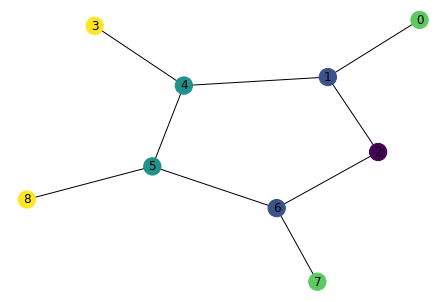

In [11]:
import pickle
with open('iteration4.pkl', 'rb') as f:
    g4 = pickle.load(f)
    drawGraph(g4)

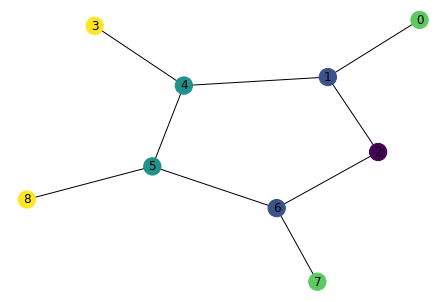

In [12]:
import pickle
with open('iteration5.pkl', 'rb') as f:
    g5 = pickle.load(f)
    drawGraph(g5)

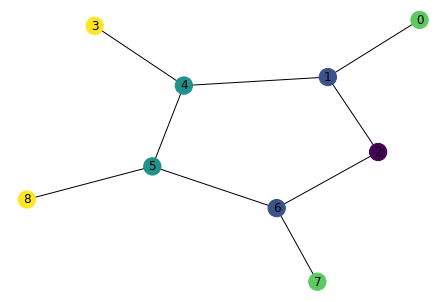

In [13]:
import pickle
with open('iteration6.pkl', 'rb') as f:
    g6 = pickle.load(f)
    drawGraph(g6)

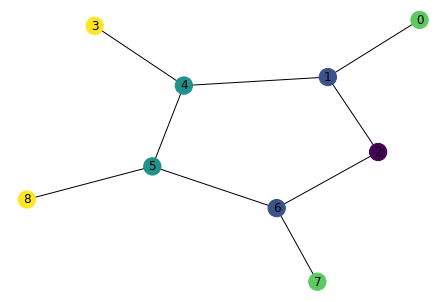

In [14]:
import pickle
with open('iteration7.pkl', 'rb') as f:
    g7 = pickle.load(f)
    drawGraph(g7)

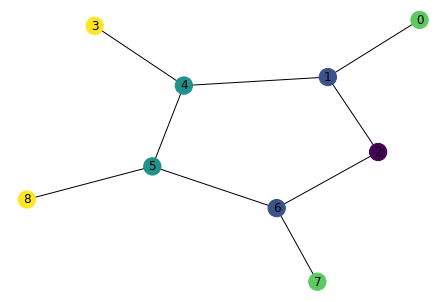

In [15]:
import pickle
with open('iteration8.pkl', 'rb') as f:
    g8 = pickle.load(f)
    drawGraph(g8)

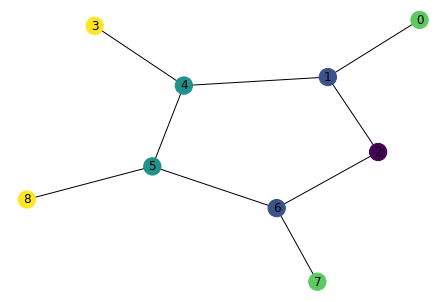

In [16]:
import pickle
with open('iteration9.pkl', 'rb') as f:
    g9 = pickle.load(f)
    drawGraph(g9)

In [17]:
colored_graph.ndata['original_feat'] = feat
reduced_graph = crg.reduced_graph(colored_graph)
with open('toy_example_reduced.pkl', 'wb') as f:
    pickle.dump(reduced_graph, f)

C:\Users\User1\Documents\GitHub\ResearchProject1\WLColorRefinement\create_reduced_graph.py:323: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reduced_graph.ndata['feat'] = torch.tensor(new_features)


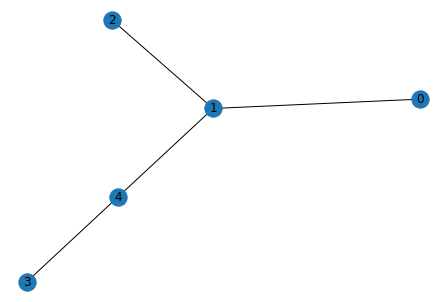

In [18]:
nx_G = reduced_graph.to_networkx().to_undirected()
pos_G = nx.kamada_kawai_layout(nx_G)
# nx.draw(nx_G, pos_G, with_labels=True, node_color=reduced_graph.ndata['feat'][: ,1])
nx.draw(nx_G, pos_G, with_labels=True)

# tensor([0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4])
# tensor([1, 0, 0, 2, 4, 1, 1, 2, 4, 3, 1, 3, 4])

In [19]:
print(reduced_graph)
print('\n')
print(reduced_graph.nodes())
print('\n')
print(reduced_graph.ndata['feat'])
print('\n')
print(reduced_graph.edges()[0])
print(reduced_graph.edges()[1])
print('\n')
print(reduced_graph.edata['feat'])

Graph(num_nodes=5, num_edges=13,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)})


tensor([0, 1, 2, 3, 4])


tensor([[0., 2.],
        [0., 2.],
        [0., 1.],
        [0., 2.],
        [0., 2.]])


tensor([0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4])
tensor([1, 0, 0, 2, 4, 1, 1, 2, 4, 3, 1, 3, 4])


tensor([1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1])


{(0, 1): Text(0.48283912154140923, 0.26673108393431033, '1'),
 (0, 0): Text(0.8427074859497131, 0.2998672695611509, '0'),
 (1, 0): Text(0.48283912154140923, 0.26673108393431033, '1'),
 (1, 2): Text(-0.05340510228138839, 0.5490229890164622, '1'),
 (1, 4): Text(-0.043251902481110625, -0.08215917464330276, '1'),
 (1, 1): Text(0.12297075713310539, 0.23359489830746974, '0'),
 (2, 1): Text(-0.05340510228138839, 0.5490229890164622, '2'),
 (2, 2): Text(-0.22978096169588216, 0.8644510797254545, '0'),
 (3, 4): Text(-0.36794864069346817, -0.6989566237970376, '1'),
 (3, 3): Text(-0.5264227192916097, -1.0, '0'),
 (4, 1): Text(-0.043251902481110625, -0.08215917464330276, '1'),
 (4, 3): Text(-0.36794864069346817, -0.6989566237970376, '1'),
 (4, 4): Text(-0.20947456209532664, -0.39791324759407526, '1')}

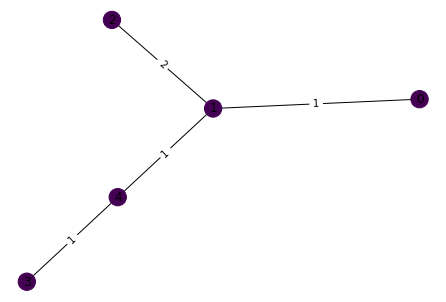

In [20]:
F = reduced_graph
nx_F = F.to_networkx().to_undirected()
pos_F = nx.kamada_kawai_layout(nx_F)
nx.draw(nx_F, pos_F, with_labels=True, node_color=F.ndata['feat'][: ,0])

edict = {}
x = F.edges()[0]
y = F.edges()[1]
for i in range(len(F.edata['feat'])):
    edict[(int(x[i]), int(y[i]))] = int(F.edata['feat'][i])
         
nx.draw_networkx_edge_labels(F,pos_F, edge_labels = edict)

In [5]:
list_feat = [th.tensor([0.8350]),
th.tensor([-2.1935]),
th.tensor([1.8422]),
th.tensor([-0.7115]),
th.tensor([0.2463]),
th.tensor([0.5230]),
th.tensor([-1.7172]),
th.tensor([-0.4237]),
th.tensor([0.9020]),
th.tensor([1.1188]),
th.tensor([1.6769]),
th.tensor([-0.2070]),
th.tensor([-0.3451]),
th.tensor([1.4856]),
th.tensor([0.8306]),
th.tensor([-0.3967]),
th.tensor([0.4612]),
th.tensor([0.1111]),
th.tensor([0.6842]),
th.tensor([1.6425]),
th.tensor([1.9810]),
th.tensor([2.8328]),
th.tensor([1.2794]),
th.tensor([-0.0582]),
th.tensor([0.7471]),
th.tensor([-0.0972]),
th.tensor([0.9659]),
th.tensor([1.7420]),
th.tensor([1.9064]),
th.tensor([0.0973]),
th.tensor([-1.3486]),
th.tensor([1.1793]),
th.tensor([2.2294]),
th.tensor([0.6047]),
th.tensor([-0.4045]),
th.tensor([1.2719]),
th.tensor([-1.5158]),
th.tensor([1.1531]),
th.tensor([2.0675]),
th.tensor([1.9595]),
th.tensor([1.0009]),
th.tensor([-0.7445]),
th.tensor([-1.8665]),
th.tensor([1.5069]),
th.tensor([1.7546]),
th.tensor([-2.2389]),
th.tensor([1.0446]),
th.tensor([2.4422]),
th.tensor([2.2458]),
th.tensor([-0.3815]),
th.tensor([-2.4207]),
th.tensor([-2.0618]),
th.tensor([0.7988]),
th.tensor([-2.9473]),
th.tensor([-1.3108]),
th.tensor([2.9129]),
th.tensor([0.4222]),
th.tensor([-2.9340]),
th.tensor([-0.4138]),
th.tensor([-0.6592]),
th.tensor([1.3577]),
th.tensor([-3.5447]),
th.tensor([3.1438]),
th.tensor([1.2628]),
th.tensor([2.8444]),
th.tensor([2.8815]),
th.tensor([1.1154]),
th.tensor([-2.3994]),
th.tensor([2.3466]),
th.tensor([-0.7858]),
th.tensor([2.2993]),
th.tensor([0.0089]),
th.tensor([0.6633]),
th.tensor([-0.8585]),
th.tensor([0.1404]),
th.tensor([2.6779]),
th.tensor([2.1312]),
th.tensor([-1.9900]),
th.tensor([0.1422]),
th.tensor([-1.9893]),
th.tensor([-1.0264]),
th.tensor([0.6782]),
th.tensor([0.6148]),
th.tensor([-6.5260]),
th.tensor([-0.2132]),
th.tensor([0.9652]),
th.tensor([1.4588]),
th.tensor([1.1029]),
th.tensor([-0.3662]),
th.tensor([0.9390]),
th.tensor([1.6023]),
th.tensor([1.5877]),
th.tensor([1.3048]),
th.tensor([1.6805]),
th.tensor([-0.6514]),
th.tensor([0.6646]),
th.tensor([1.1365]),
th.tensor([1.3956]),
th.tensor([-0.5156]),
th.tensor([-3.4425])]

In [10]:
with open('toy_example_orignal.pkl', 'rb') as f:
    x = pickle.load(f)
toy_example_dataset = [] 

for i in range(100):
    toy_example_dataset.append([x, list_feat[i]])

In [11]:
with open('toy_example_original_dataset.pkl', 'wb') as f:
    pickle.dump([toy_example_dataset,toy_example_dataset,toy_example_dataset, 28, 4], f)

In [6]:
print(len(list_feat))

100


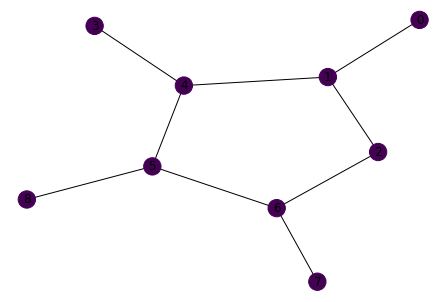

In [13]:
drawGraph(x)